In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# read the data

data_df = pd.read_csv(r"Customer_Churn.csv")
data_df.head()
data_df.drop(['customerID','TotalCharges'],axis=1,inplace=True)

In [11]:
cat = data_df.select_dtypes(include="object").columns
num = data_df.select_dtypes(exclude="object").columns

In [13]:
data_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [21]:
# data_df["TotalCharges"] = data_df["TotalCharges"].replace(" ","0")
# data_df["TotalCharges"] = data_df["TotalCharges"].astype("float")

In [25]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [27]:
data_df.isnull().sum().sum()

0

In [29]:
data_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [34]:
# data_df['customerID'].duplicated().sum()

In [37]:
def conv(value):
    if value == 1:
        return "yes"

    else:
        return "no"

data_df["SeniorCitizen"] = data_df["SeniorCitizen"].apply(conv)

converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

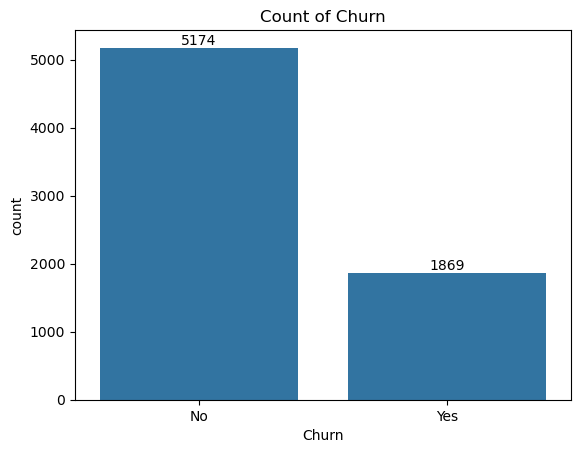

In [40]:
ax = sns.countplot(x ='Churn',data = data_df)
ax.bar_label(ax.containers[0])
plt.title("Count of Churn")
plt.show()

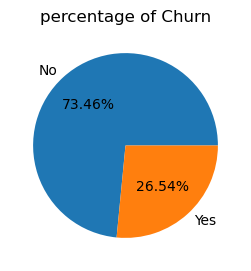

In [42]:
plt.figure(figsize=(5,3))
gb = data_df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct= "%1.2f%%")
plt.title("percentage of Churn")
plt.show()

We can conclude from the pie chart that 26.54% of our customers have churned out.

not let's explore the reason  behind it 

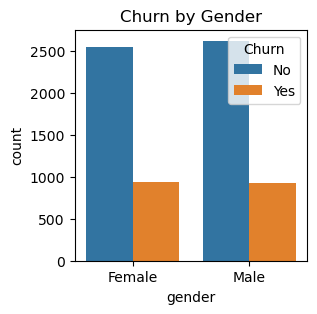

In [45]:
plt.figure(figsize=(3,3))
sns.countplot(x = "gender", data = data_df, hue = 'Churn')
plt.title("Churn by Gender")
plt.show()

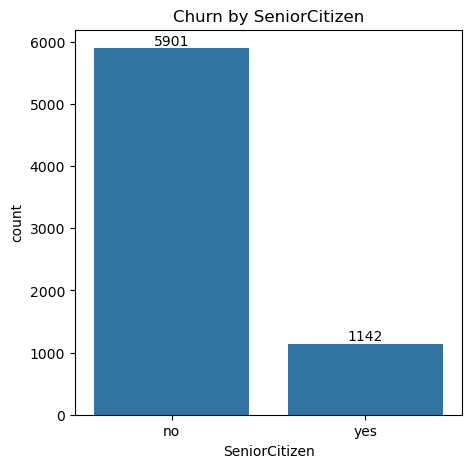

In [47]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = "SeniorCitizen", data = data_df)
ax.bar_label(ax.containers[0])
plt.title("Churn by SeniorCitizen")
plt.show()

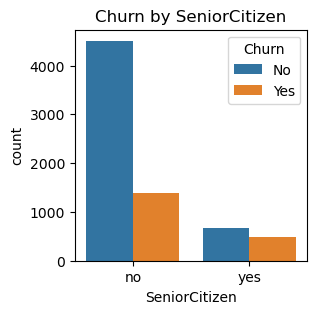

In [49]:
plt.figure(figsize=(3,3))
sns.countplot(x = "SeniorCitizen", data = data_df, hue = 'Churn')
plt.title("Churn by SeniorCitizen")
plt.show()

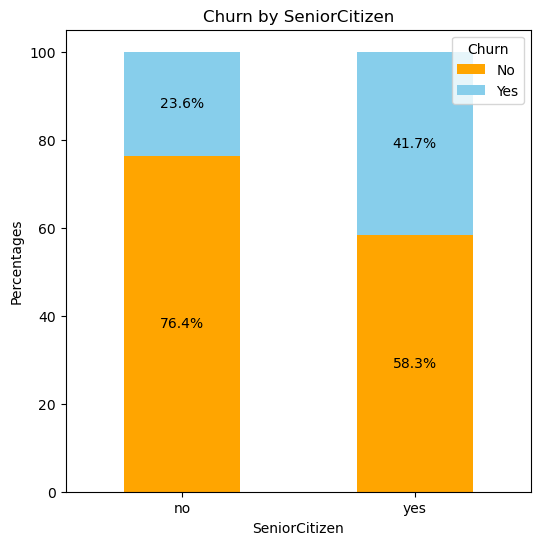

In [52]:
total_counts = data_df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack() * 100

fig, ax = plt.subplots(figsize=(6, 6))

total_counts.plot(kind='bar', stacked=True, ax=ax, color=["orange", "skyblue"])

# Add annotations
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x = bar.get_x()
    y = bar.get_y()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title("Churn by SeniorCitizen")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentages")
plt.xticks(rotation=0)
plt.legend(title="Churn", loc="upper right")
plt.savefig('Churn_by_SeniorCitizen.png')

plt.show()




In [54]:
# comparative a greated pecentage of people in senior citizen category have churned 

people who have used our servvices for a long time have stayed and people who have used our sevices. 1 or 2 months have churned

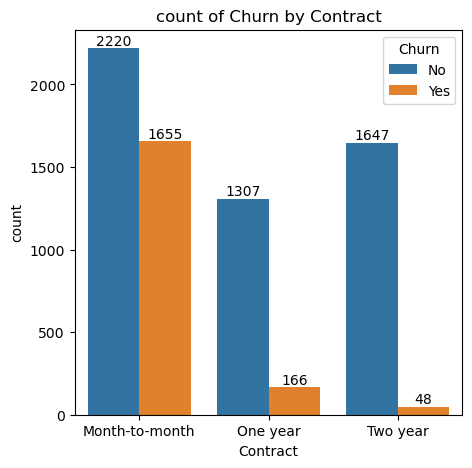

In [57]:

plt.figure(figsize=(5,5))
ax = sns.countplot(x = "Contract", data = data_df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("count of Churn by Contract")
plt.savefig('count of Churn by Contract.png')
plt.show()

People with a month-to-month contract are more likely to churn than those with a one-year or two-year contract.

In [60]:
data_df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype=object)

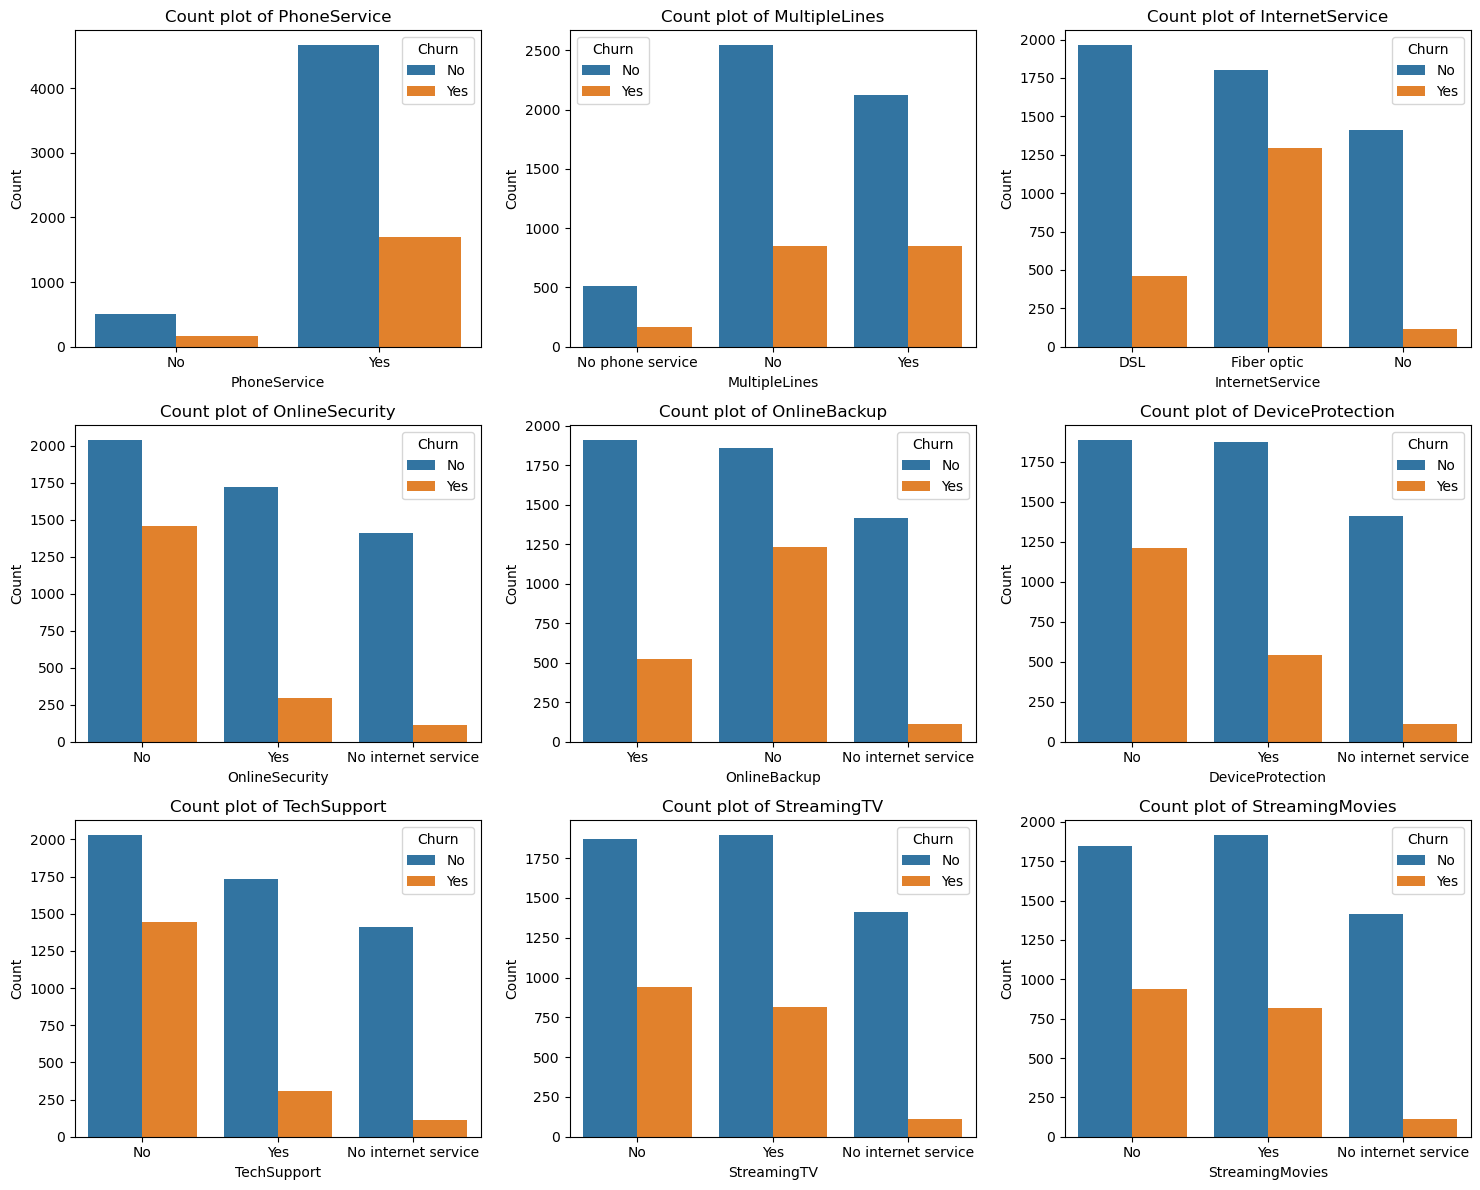

In [62]:

columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data=data_df, ax=axes[i], hue = data_df['Churn'])
    axes[i].set_title(f"Count plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

    

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.savefig('col.png')
plt.tight_layout()
plt.show()


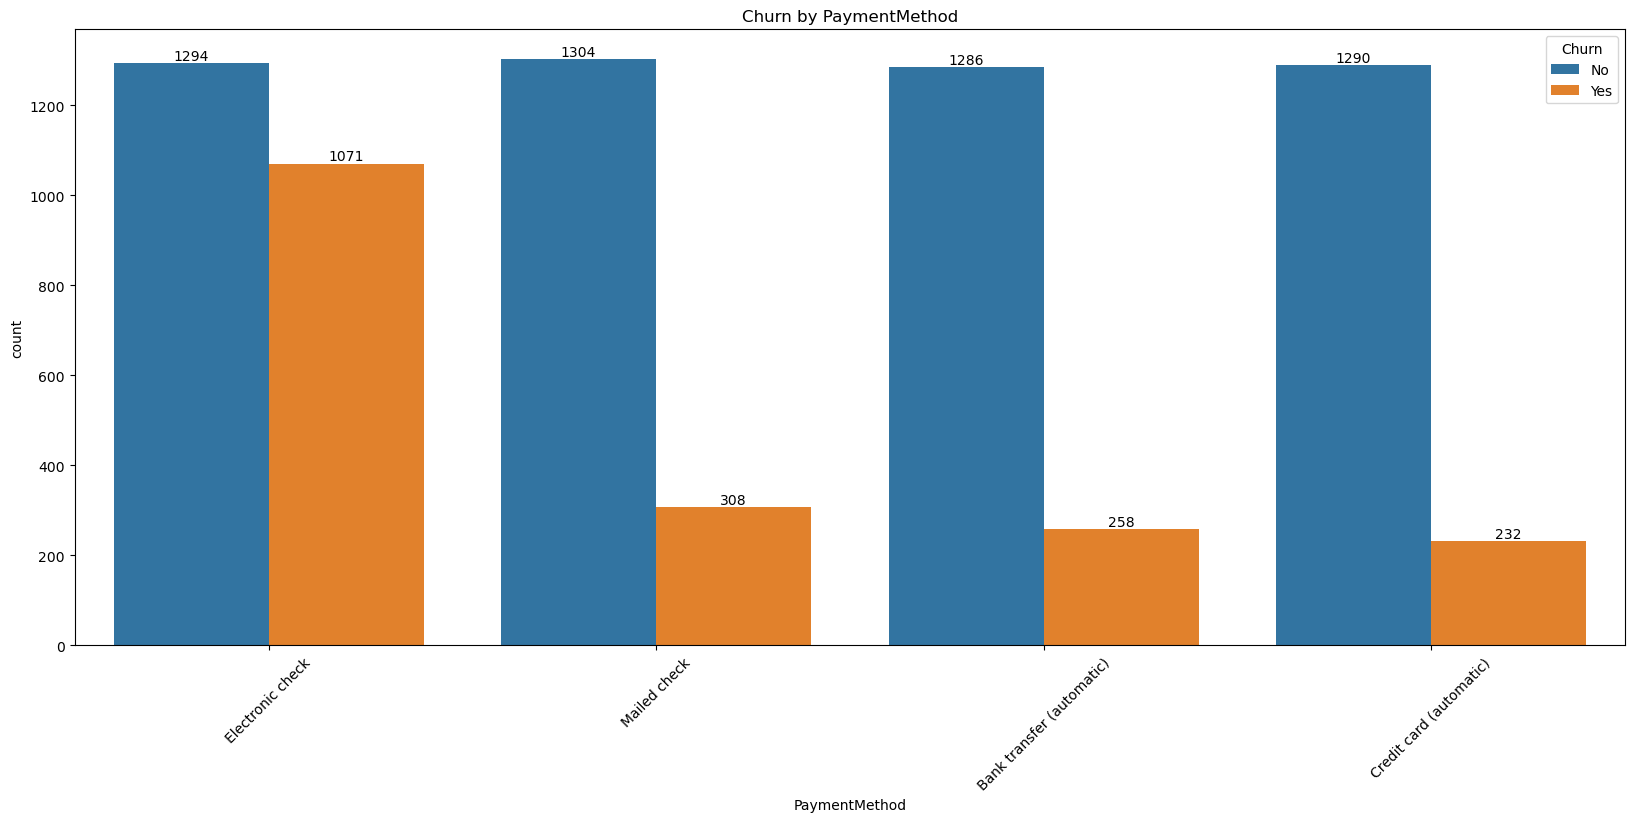

In [63]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x = "PaymentMethod", data = data_df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by PaymentMethod")
plt.savefig('Churn_by_PaymentMethod.png')
plt.xticks(rotation = 45)
plt.show()

customer is likely to churn when he isnmi using electronic check as a payment method

In [67]:
num

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [71]:
cat

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

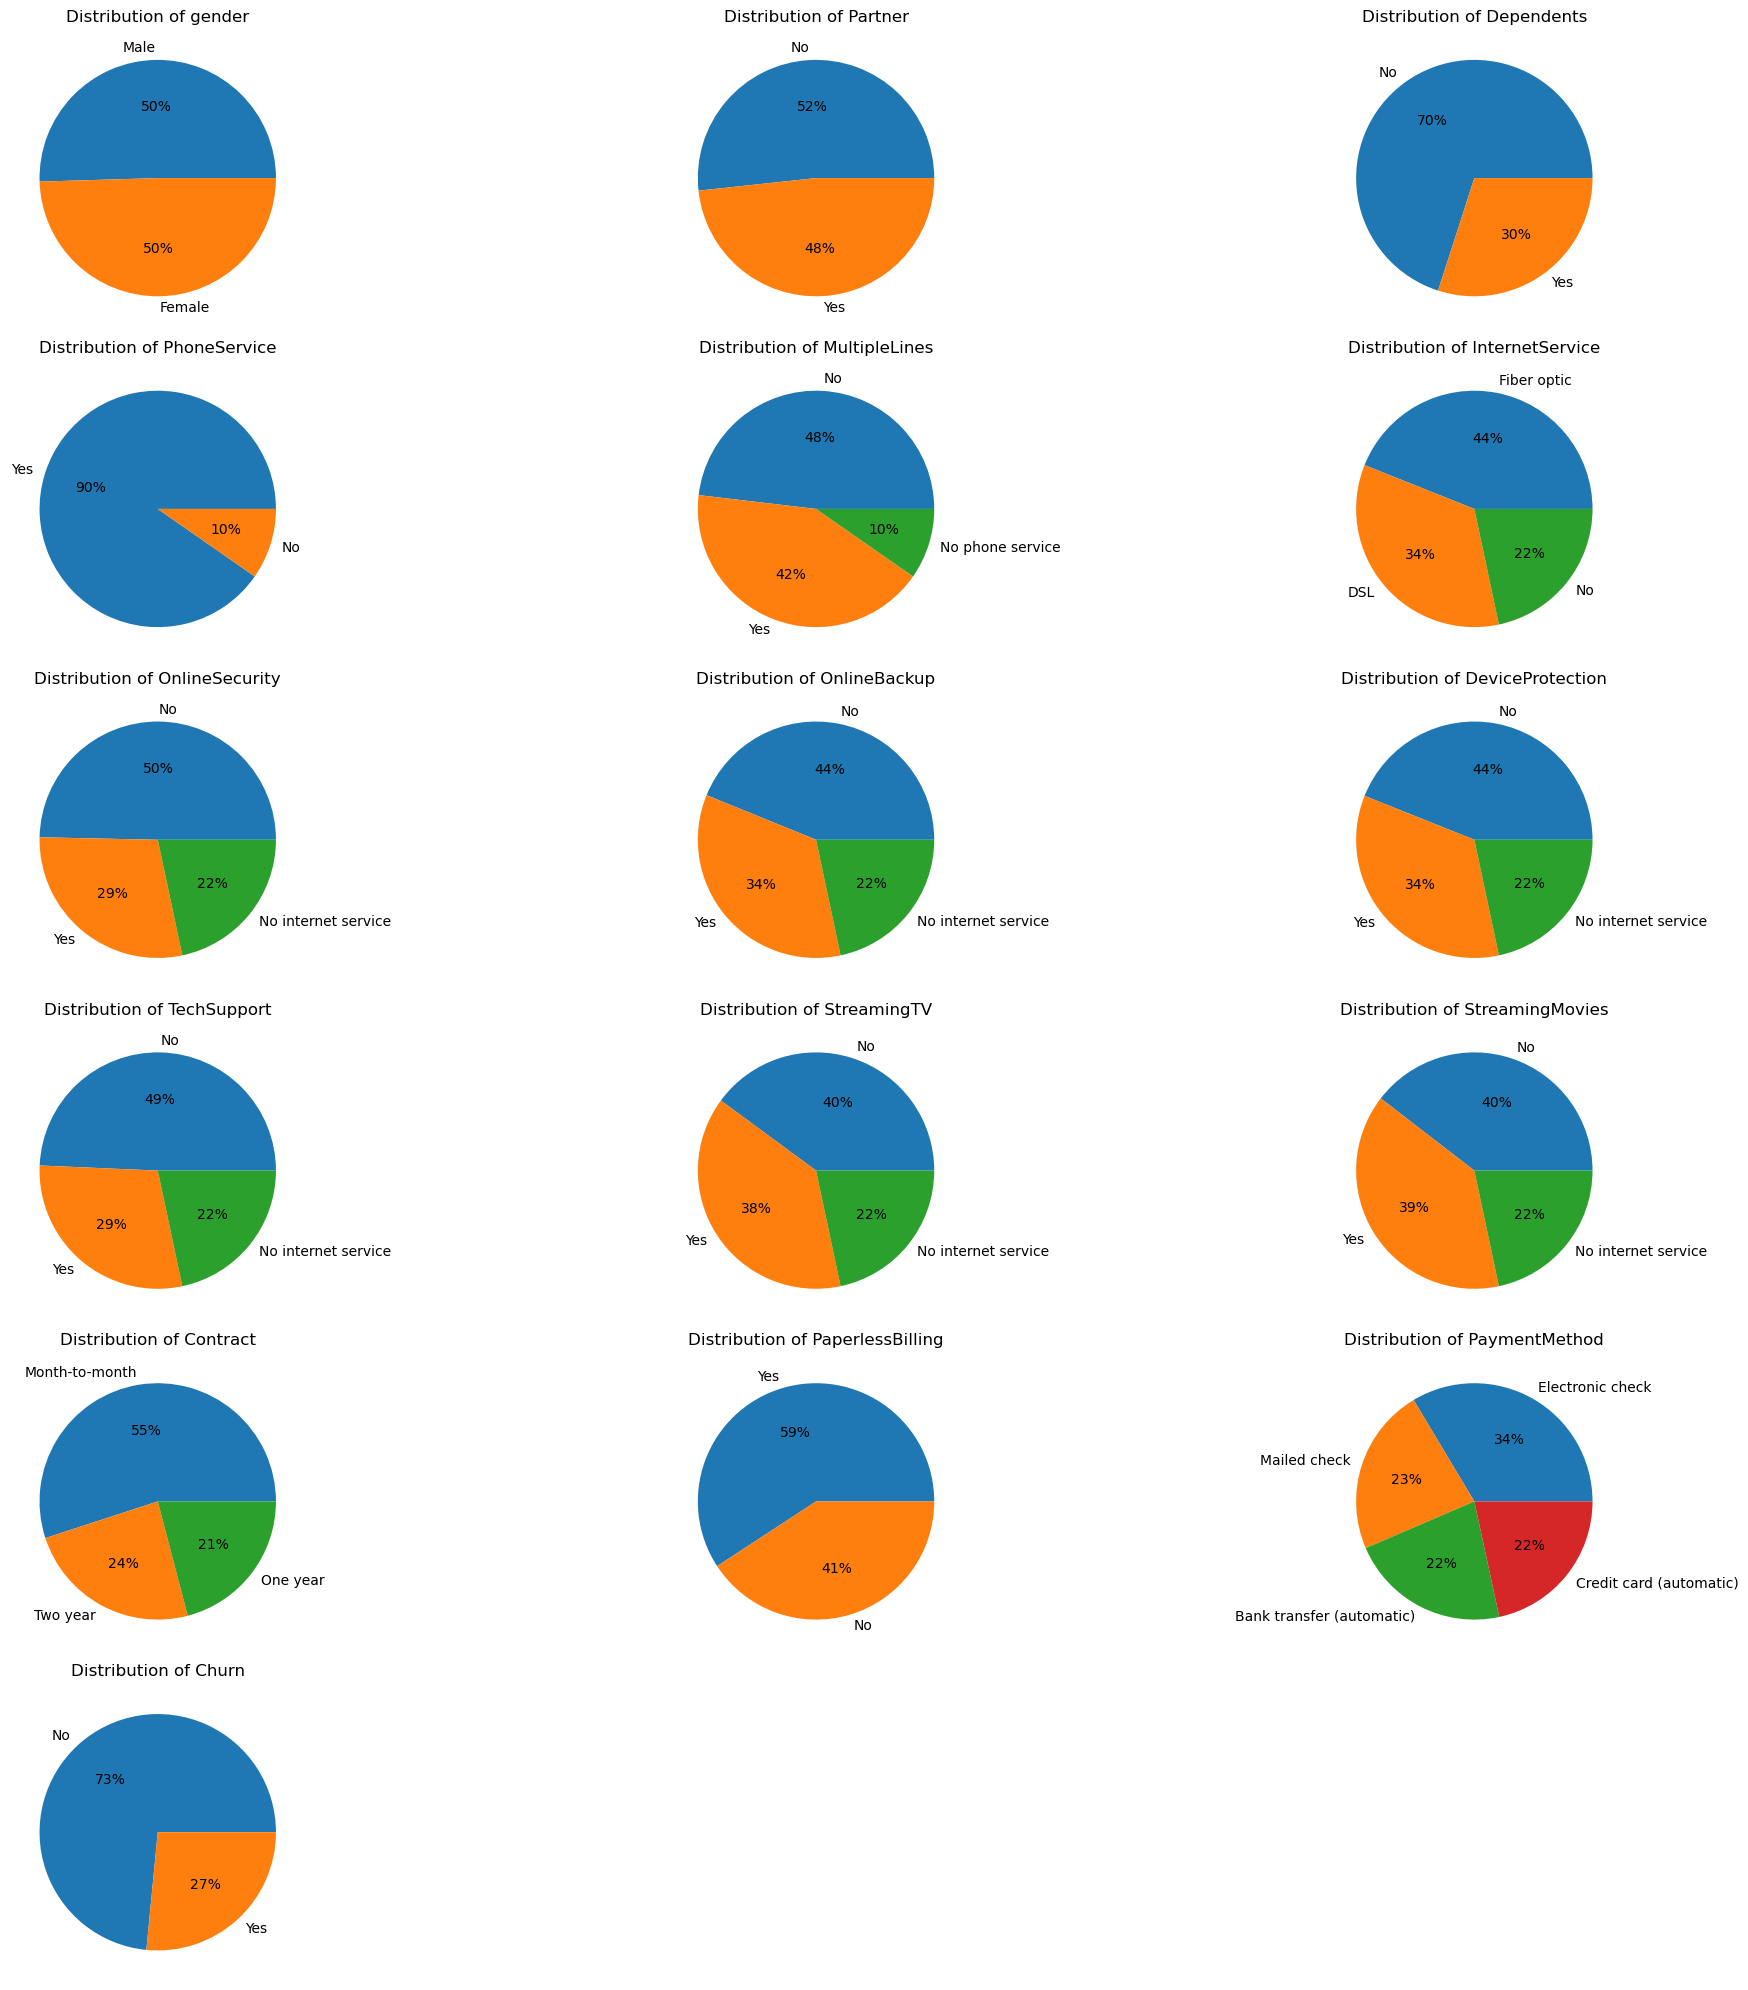

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
n_cols = 3
n_rows = (len(cat) + n_cols - 1) // n_cols

for i, col in enumerate(cat):
    key = data_df[col].value_counts().keys()
    value = data_df[col].value_counts().values
    plt.subplot(n_rows, n_cols, i + 1)
    plt.pie(value, labels=key, autopct="%0.0f%%")
    plt.title(f"Distribution of {col}")
plt.savefig('All_Categorical_pie.png')

plt.tight_layout()
plt.show()


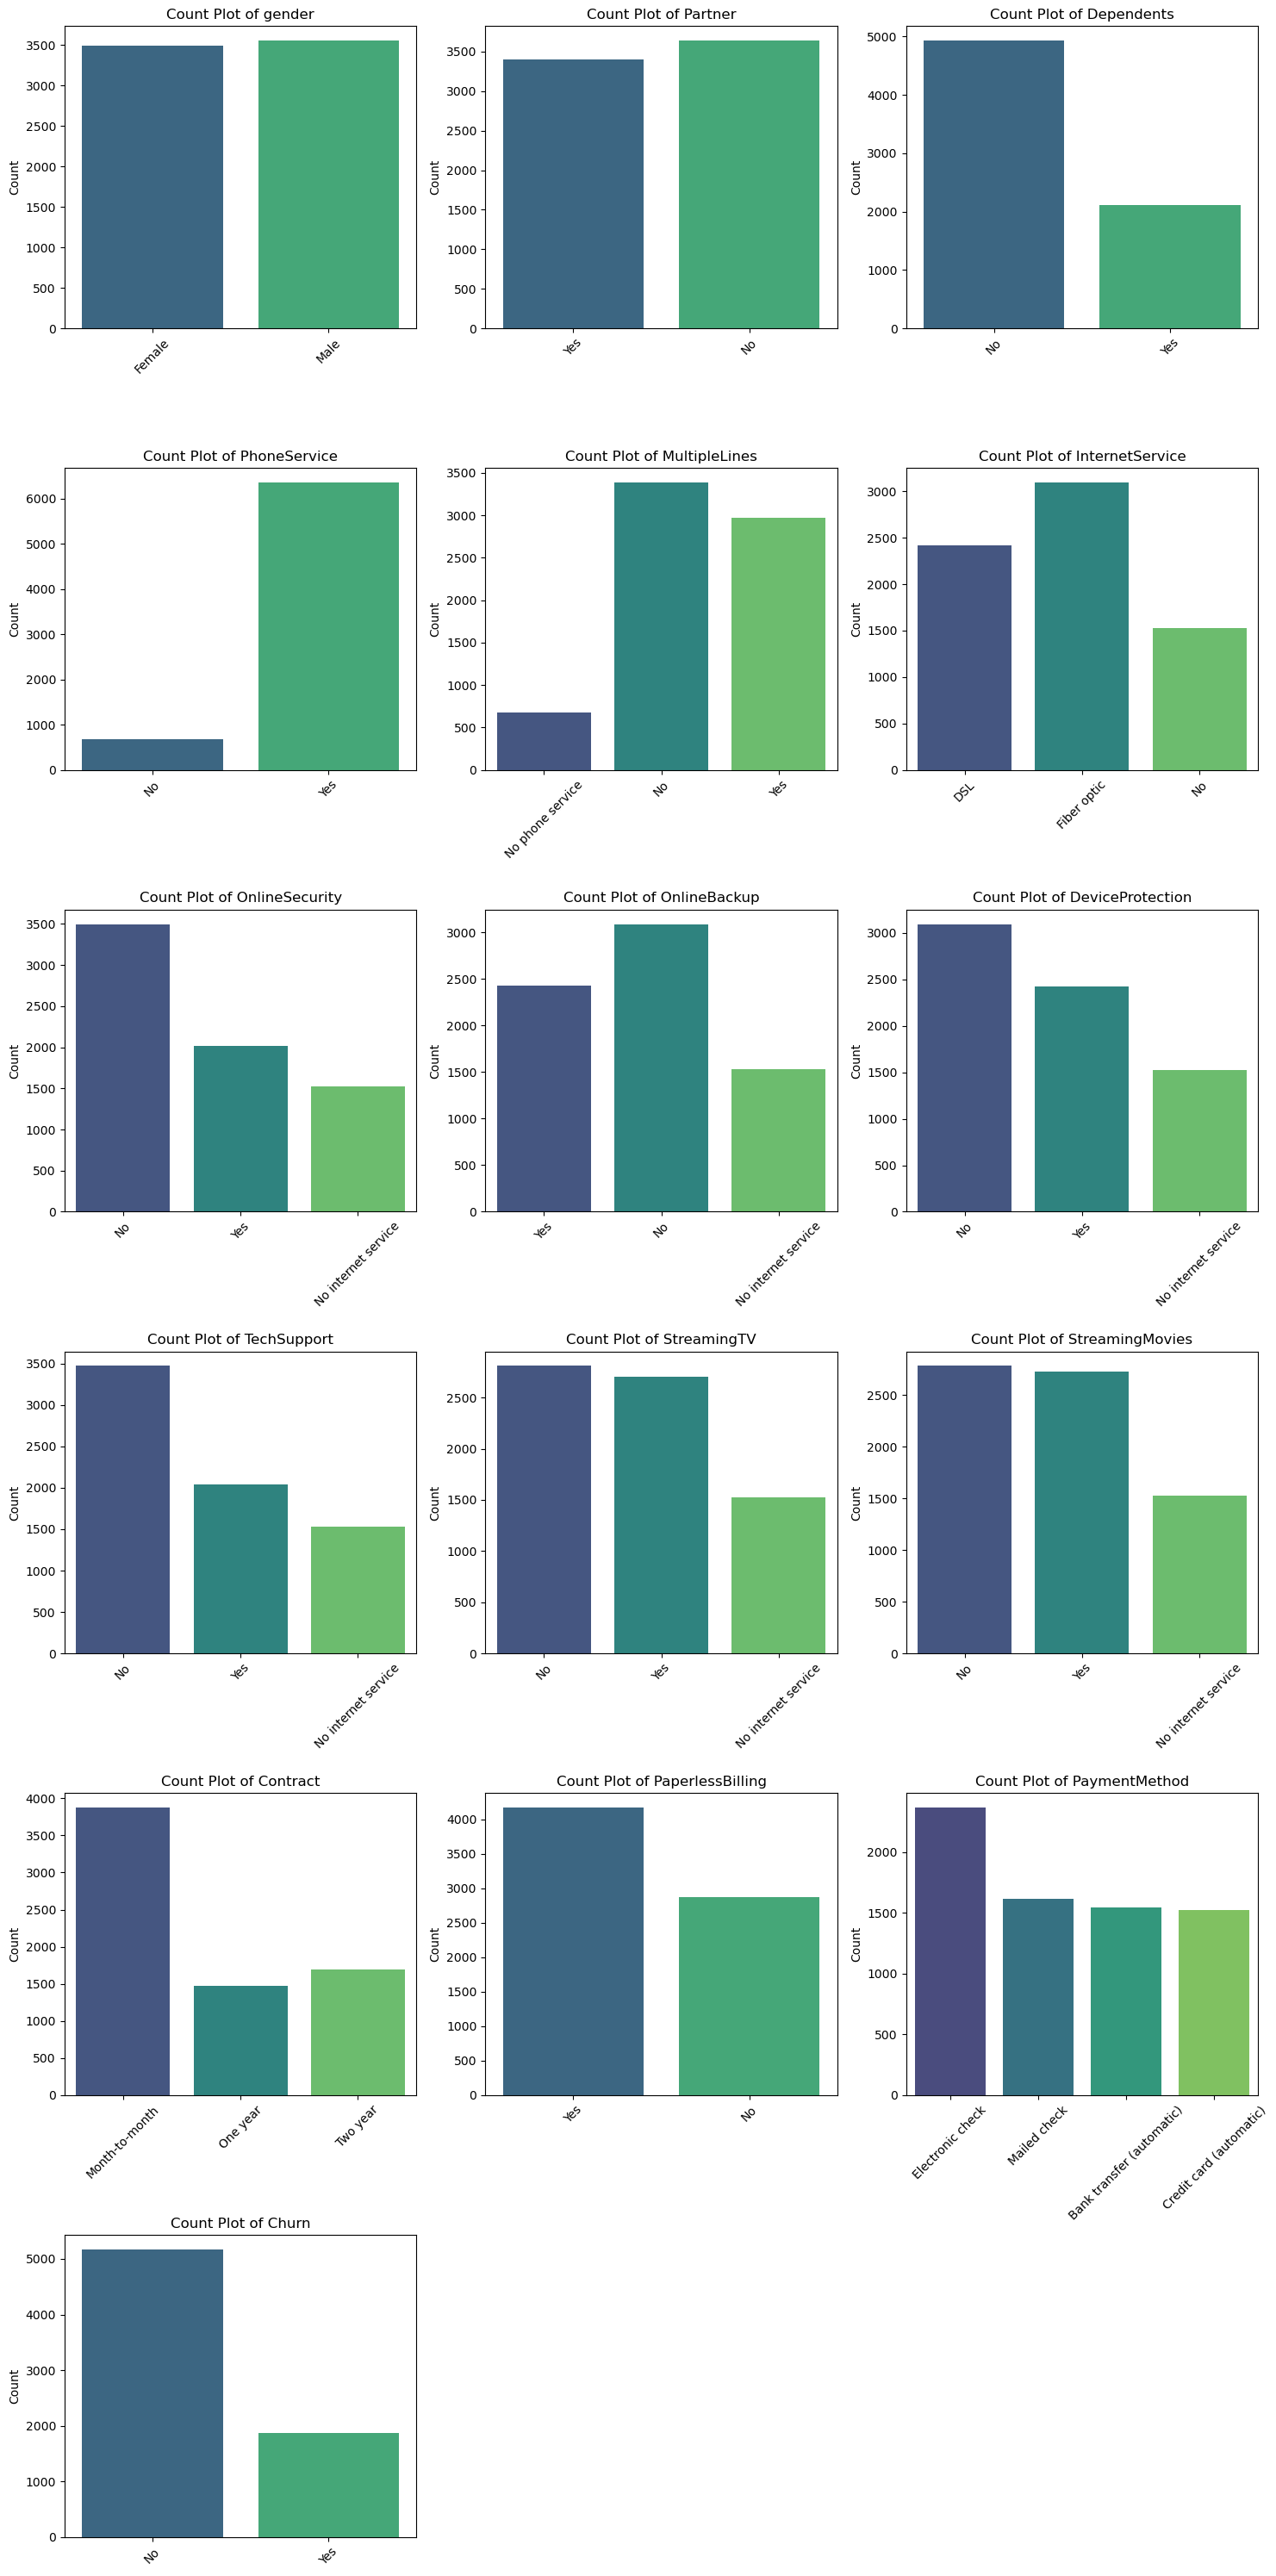

In [103]:
import warnings
warnings.filterwarnings("ignore")
n_cols = 3
n_rows = (len(cat) + n_cols - 1) // n_cols 

plt.figure(figsize=(15, n_rows * 5))  

for i, col in enumerate(cat):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=data_df, x=col, palette="viridis")
    plt.title(f"Count Plot of {col}")
    plt.xlabel("")
    plt.ylabel("Count")
    plt.xticks(rotation=45)  
    
plt.savefig('All_Categorical_countplot.png')

plt.tight_layout()
plt.show()
